<a href="https://colab.research.google.com/github/barbaradinizabreu/ICD-UFMG/blob/main/TP_ICD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega 2 - Introdução à Ciência de Dados

## Integrantes
Bárbara Diniz Abreu - 2023001670  
Beatriz Camilly Gulart Pereira - 2023087753  
João Paulo Moura Furtado - 2023001891  
Caio Brega Có Silva - 2023070842  

## Perguntas
##### 1 - É possível prever o número de pessoas privadas de liberdade em um estado nos próximos anos a partir do histórico da população carcerária e da disponibilidade de vagas no sistema prisional?

##### 2 - A adoção das audiências de custódia, implementadas a partir de 2015, teve impacto significativo na redução da proporção de presos no Brasil?

##### 3 - Existe uma correlação entre a falta de estrutura prisional (como superlotação e falta de recursos*) e a frequência de motins, rebeliões e outras formas de distúrbios internos?

##### 4 - Existe uma correlação entre o tipo de crime pelo qual os detentos foram condenados (especialmente homicídio qualificado, homicídio simples e lesão corporal) e a incidência de óbitos prisionais de natureza criminal?

##Banco de dados

O conjunto de dados utilizado neste trabalho é o **Levantamento Nacional de Informações Penitenciárias**, disponibilizado pela **Secretaria Nacional de Políticas Penais (SENAPPEN)**.

**Disponível em:** [SENAPPEN - Bases de Dados](https://www.gov.br/senappen/pt-br/servicos/sisdepen/bases-de-dados)


### Importação dos dados

In [1]:
import pandas as pd
import numpy as np

!gdown --folder https://drive.google.com/drive/folders/1lJmdpSd02WE6FaUpB8_lGBqRqEElGvaQ?usp=sharing --output .

dados = pd.read_csv('/content/sisdepen_1_17_csv.csv', encoding='utf-8', sep=';')

Retrieving folder contents
Processing file 1lwLd-VJJgsRyRuNEviTRyiSYN4uPwAMi sisdepen_1_17_csv.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1lwLd-VJJgsRyRuNEviTRyiSYN4uPwAMi
From (redirected): https://drive.google.com/uc?id=1lwLd-VJJgsRyRuNEviTRyiSYN4uPwAMi&confirm=t&uuid=22771438-0f3e-459d-b3c3-2977d2ee2b85
To: /content/sisdepen_1_17_csv.csv
100% 125M/125M [00:01<00:00, 125MB/s]
Download completed


<ipython-input-1-b0864f987e15>:6: DtypeWarning: Columns (37,129,131,188,223,390,1737,1740) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('/content/sisdepen_1_17_csv.csv', encoding='utf-8', sep=';')


In [2]:
print(dados.head())

   ciclo   Ano Referência                  Tipo do Estabelecimento  \
0     17  2024     2024/2  Domiciliar com monitoramento eletrônico   
1     17  2024     2024/2  Domiciliar com monitoramento eletrônico   
2     17  2024     2024/2  Domiciliar com monitoramento eletrônico   
3     17  2024     2024/2  Domiciliar com monitoramento eletrônico   
4     17  2024     2024/2  Domiciliar com monitoramento eletrônico   

  Situação de Preenchimento      ID  \
0                  Validado  4410.0   
1                  Validado  5570.0   
2                  Validado  3581.0   
3                  Validado  3579.0   
4                  Validado  1841.0   

                             Nome do Estabelecimento  UF  \
0  NÚCLEO DE MONITORAMENTO ELETRONICO DOMICILIAR ...  AC   
1  NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...  AC   
2  NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...  AC   
3  NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...  AC   
4  UNIDADE DE MONITORAMENTO ELETRÔNICO DOMIC

In [3]:
#apagar depois
dados.head()

,ciclo,Ano,Referência,Tipo do Estabelecimento,Situação de Preenchimento,ID,Nome do Estabelecimento,UF,Situação do Estabelecimento,Outras Denominações,...,6.1 Quantidade de pessoas privadas de liberdade em programas de laborterapia | Quantidade de pessoas em vagas disponibilizadas pela administração prisional em parceria com entidade ou organizações não governamentais sem fins lucrativos | Setor secundár17,6.1 Quantidade de pessoas privadas de liberdade em programas de laborterapia | Quantidade de pessoas em vagas disponibilizadas pela administração prisional em parceria com entidade ou organizações não governamentais sem fins lucrativos | Setor secundár18,6.1 Quantidade de pessoas privadas de liberdade em programas de laborterapia | Quantidade de pessoas em vagas disponibilizadas pela administração prisional em parceria com entidade ou organizações não governamentais sem fins lucrativos | Setor terciário -,6.1 Quantidade de pessoas privadas de liberdade em programas de laborterapia | Quantidade de pessoas em vagas disponibilizadas pela administração prisional em parceria com entidade ou organizações não governamentais sem fins lucrativos | Setor terciári19,6.1 Quantidade de pessoas privadas de liberdade em programas de laborterapia | Quantidade de pessoas em vagas disponibilizadas pela administração prisional em parceria com entidade ou organizações não governamentais sem fins lucrativos | Setor terciári20,6.1 Quantidade de pessoas privadas de liberdade em programas de laborterapia | Quantidade de pessoas em vagas disponibilizadas pela administração prisional em parceria com entidade ou organizações não governamentais sem fins lucrativos | Setor terciári21,6.1 Quantidade de pessoas privadas de liberdade em programas de laborterapia | Quantidade de pessoas em vagas disponibilizadas pela administração prisional em parceria com entidade ou organizações não governamentais sem fins lucrativos | Setor terciári22,5.2 Quantidade de pessoas privadas de liberdade por cor de pele/raça/etnia | Outras | Masculino,5.2 Quantidade de pessoas privadas de liberdade por cor de pele/raça/etnia | Outras | Feminino,5.2 Quantidade de pessoas privadas de liberdade por cor de pele/raça/etnia | Outras | Total
0,17,2024,2024/2,Domiciliar com monitoramento eletrônico,Validado,4410.0,NÚCLEO DE MONITORAMENTO ELETRONICO DOMICILIAR ...,AC,Ativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,2024,2024/2,Domiciliar com monitoramento eletrônico,Validado,5570.0,NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...,AC,Ativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,2024,2024/2,Domiciliar com monitoramento eletrônico,Validado,3581.0,NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...,AC,Ativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,2024,2024/2,Domiciliar com monitoramento eletrônico,Validado,3579.0,NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...,AC,Ativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,2024,2024/2,Domiciliar com monitoramento eletrônico,Validado,1841.0,UNIDADE DE MONITORAMENTO ELETRÔNICO DOMICILIAR...,AC,Ativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variáveis que serão utilizadas (campo destinado somente para organização do tp)


Pergunta 1  
Serão utilizadas as colunas '1.3 Capacidade do estabelecimento' e as colunas '5.1. Quantidade de pessoas privadas de liberdade por faixa etária'

&nbsp;  
Pergunta 2  
  
&nbsp;  
Pergunta 3
Existe uma correlação entre a falta de estrutura prisional (como superlotação e falta de recursos*) e a frequência de motins, rebeliões e outras formas de distúrbios internos?
  
&nbsp;  
Pergunta 4  
Serão utilizadas as colunas '6.8. Mortalidade no Sistema Prisional (total do período)' e as colunas '5.14 Quantidade de incidências por tipo penal'

### Limpeza dos Dados

O banco de dados possuía, inicialmente, 1782 colunas com informações sobre presídios de todo o Brasil.

Selecionando as colunas 'Situação de Preenchimento' e 'Situação do Estabelecimento' percebemos uma uniformidade. Dentre as respostas possíveis, todas foram 'validado' e 'ativo', respectivamente. Isso significa que as informações recolhidas via questionário por formulário foram preenchidas em totalidade e que todos os presídios registrados estão em operação.

Pensando nessa uniformidade, removemos essas colunas visto que elas não acrescentam informações relevantes que permitam a distinção entre os dados.


In [4]:
def existe_uniformidade(dados, coluna, resposta_padrao):
    return (dados[coluna] == resposta_padrao).all()

print(existe_uniformidade(dados, 'Situação de Preenchimento', 'Validado'))
print(existe_uniformidade(dados, 'Situação do Estabelecimento', 'Ativo'))

True
True


As demais colunas retiradas foram removidas por não serem interessantes para a realização do nosso trabalho prático.

In [5]:
# Prefixos gerais para remoção
prefixos = [
    'Situação de Preenchimento',
    'Situação do Estabelecimento',
    'Outras Denominações',
    'Âmbito',
    'Município',
    'Endereço',
    'Bairro',
    'CEP',
    'Código IBGE',
    'Telefone Principal',
    '1.4 Gestão do estabelecimento',
    '1.5 Quais serviços são terceirizados?',
    '5.2 Quantidade de pessoas privadas de liberdade por cor de pele/raça/etnia',
    '5.3 Quantidade de pessoas privadas de liberdade por procedência',
    '5.4 Estado civil',
    '5.5 Pessoas com deficiência',
    '5.6 Quantidade de pessoas privadas de liberdade por grau de instrução',
    '5.7 Número de pessoas privadas de liberdade com documentos pessoais',
    '5.8 Quantidade de pessoas privadas de liberdade por nacionalidade',
    '5.9 Faixa etária dos filhos que estão no estabelecimento (aplicável apenas para estabelecimentos com mulheres)',
    '5.10 Número de filhos/as',
    '5.11 Número de pessoas privadas de liberdade que possuem visitantes cadastrados',
    '5.14 Quantidade de incidências por tipo penal | Número de pessoas privadas de liberdade com informação sobre tipificação criminal',
    '5.14 Quantidade de incidências por tipo penal | Número de pessoas privadas de liberdade sem informação sobre tipificação criminal',
    '7.3 Quantidade de visitas registradas no período de referência',
    '7.4. Total de apreensões no período de referência',
    '7.5 Foi realizada visita(s) de inspeção no período de referência?'
]

# Colunas específicas a serem removidas
colunas_especificas = [
    '1.1 Estabelecimento originalmente destinado a pessoa privadas de liberdade do sexo',
    '1.2 Tipo de estabelecimento - originalmente destinado',
    '1.8 Possui regimento interno?',
    '1.9 O regimento interno é específico para este estabelecimento ou se aplica aos demais estabelecimentos do Estado?',
    '1.6 Data de inauguração do estabelecimento',
    '1.7 O estabelecimento foi concebido como estabelecimento penal ou foi construído para outra utilização e foi adaptado?',
    '5.14 Quantidade de incidências por tipo penal | Masculino',
    '5.14 Quantidade de incidências por tipo penal | Feminino'
]

# Colunas que começam com '6', exceto as que começam com '6.8'
colunas_6 = [
    col for col in dados.columns
    if col.startswith('6') and not col.startswith('6.8')
]

colunas_por_prefixo = [
    col for col in dados.columns
    if any(col.startswith(pref) for pref in prefixos)
]

colunas_para_remover = colunas_6 + colunas_por_prefixo + colunas_especificas
dados_filtrados = dados.drop(columns=colunas_para_remover)

# Substitui espaços vazios por 'NaN'
dados_filtrados = dados_filtrados.replace(r'^\s*$', np.nan, regex=True)


In [6]:
#from google.colab import files
#dados_filtrados.to_csv('dados_filtrados.csv', index=False)
#files.download('dados_filtrados.csv')

In [7]:
for col in dados_filtrados.columns:
    print(f"'{col}'")

'ciclo'
'Ano'
'Referência'
'Tipo do Estabelecimento'
'ID'
'Nome do Estabelecimento'
'UF'
'1.3 Capacidade do estabelecimento | Presos provisórios | Masculino'
'1.3 Capacidade do estabelecimento | Presos provisórios | Feminino'
'1.3 Capacidade do estabelecimento | Presos provisórios | Total'
'1.3 Capacidade do estabelecimento | Regime fechado | Masculino'
'1.3 Capacidade do estabelecimento | Regime fechado | Feminino'
'1.3 Capacidade do estabelecimento | Regime fechado | Total'
'1.3 Capacidade do estabelecimento | Regime semiaberto | Masculino'
'1.3 Capacidade do estabelecimento | Regime semiaberto | Feminino'
'1.3 Capacidade do estabelecimento | Regime semiaberto | Total'
'1.3 Capacidade do estabelecimento | Regime aberto | Masculino'
'1.3 Capacidade do estabelecimento | Regime aberto | Feminino'
'1.3 Capacidade do estabelecimento | Regime aberto | Total'
'1.3 Capacidade do estabelecimento | Regime Disciplinar Diferenciado (RDD) | Masculino'
'1.3 Capacidade do estabelecimento | Regime D

In [8]:
#apagar depos
dados_filtrados.head()

'''para baixar o csv
dados_filtrados.to_csv('dadosfiltrageminicial.csv', index=True, header=True, sep=';', encoding='utf-8')'''

"para baixar o csv\ndados_filtrados.to_csv('dadosfiltrageminicial.csv', index=True, header=True, sep=';', encoding='utf-8')"

Várias colunas estavam preenchidas erroneamente.

Temos de exemplo a coluna "1.4 Gestão do estabelecimento", que deveria ter sido preenchida exclusivamente com dados categóricos (pública, parceria pública-privada, co-gestão e organizações sem fins lucrativos). Várias linhas dessa coluna apresentavam dados númericos, provavelmente advindos das colunas anteriores.

### Lidando com os NA's

## Análise Exploratória dos Dados (EDA)

#### Pergunta 1
Para essa análise serão investigadas a evolução temporal da população carcerária por estado e a relação entre capacidade total de vagas e número total de presos


#### Pergunta 2

#### Pergunta 3

#### Pergunta 4
- Limpeza e estruturação dos dados  


In [9]:
coluna_populacao_prisional = ['4.1 População prisional | Total']

# Lista com o nome da coluna que representa a variável de óbitos criminais
mortalidade_criminal = [
    '6.8 Mortalidade no Sistema Prisional (total do período) | Óbitos criminais | Total'
]

# Palavra-chave para identificar colunas relacionadas a incidência de crimes
crimes = [
    '5.14 Quantidade de incidências por tipo penal'
]

# Seleciona as colunas de crimes com base no nome (todas que contenham '5.14' e 'Total')
colunas_crimes = [
    col for col in dados_filtrados.columns
    if '5.14' in col and 'Total' in col and any(tipo in col for tipo in crimes)
]

# Junta as colunas de crimes com a coluna de óbitos criminais
colunas_selecionadas = colunas_crimes + mortalidade_criminal + coluna_populacao_prisional

dados_filtrados4 = dados_filtrados[colunas_selecionadas]

# Substitui células que estão vazias (espacios em branco) por NaN
dados_filtrados4 = dados_filtrados4.replace(r'^\s*$', np.nan, regex=True)

In [10]:
# Renomeação das colunas
dados_filtrados4_renomeados = dados_filtrados4.copy()
dados_filtrados4_renomeados.columns = [
    'Populacao_Prisional',
    'Pessoa_Homicidio_Simples',
    'Pessoa_Homicidio_Culposo',
    'Pessoa_Homicidio_Qualificado',
    'Pessoa_Aborto',
    'Pessoa_Lesao_Corporal',
    'Pessoa_Violencia_Domestica',
    'Pessoa_Sequestro_Carcere',
    'Pessoa_Outros_122_154A',

    'Patrimonio_Furto_Simples',
    'Patrimonio_Furto_Qualificado',
    'Patrimonio_Roubo_Simples',
    'Patrimonio_Roubo_Qualificado',
    'Patrimonio_Latrocinio',
    'Patrimonio_Extorsao',
    'Patrimonio_Extorsao_Sequestro',
    'Patrimonio_Apropriacao_Indebita',
    'Patrimonio_Apropriacao_Previdenciaria',
    'Patrimonio_Estelionato',
    'Patrimonio_Receptacao',
    'Patrimonio_Receptacao_Qualificada',
    'Patrimonio_Outros_156_179',

    'Sexual_Estupro',
    'Sexual_Atentado_Violento_Pudor',
    'Sexual_Estupro_Vulneravel',
    'Sexual_Corrupcao_Menores',
    'Sexual_Trafico_Internacional',
    'Sexual_Trafico_Interno',
    'Sexual_Outros',

    'PazPublica_Quadrilha_Bando',

    'FePublica_Moeda_Falsa',
    'FePublica_Falsificacao_Documentos',
    'FePublica_Falsidade_Ideologica',
    'FePublica_Uso_Documento_Falso',

    'AdmPublica_Peculato',
    'AdmPublica_Concussao_Exacao',
    'AdmPublica_Corrupcao_Passiva',

    'Particular_Corrupcao_Ativa',
    'Particular_Contrabando_Descaminho',

    'Drogas_Trafico',
    'Drogas_Associacao_Trafico',
    'Drogas_Trafico_Internacional',

    'Armas_Porte_Ilegal_Permitido',
    'Armas_Disparo',
    'Armas_Porte_Ilegal_Restrito',
    'Armas_Comercio_Ilegal',
    'Armas_Trafico_Internacional',

    'Transito_Homicidio_Culposo',

    'LegEspecifica_Outros_303_312',
    'LegEspecifica_ECA_Lei_8.069',
    'LegEspecifica_Genocidio',
    'LegEspecifica_Tortura',
    'LegEspecifica_MeioAmbiente',
    'LegEspecifica_ECA_Lei_869',

    'Obitos_Criminais_Total'
]

In [11]:
print(dados_filtrados4_renomeados.head(15))

    Populacao_Prisional  Pessoa_Homicidio_Simples  Pessoa_Homicidio_Culposo  \
0                   NaN                       NaN                       NaN   
1                   NaN                       NaN                       NaN   
2                   NaN                       NaN                       NaN   
3                   NaN                       NaN                       NaN   
4                 109.0                       0.0                     180.0   
5                  60.0                       2.0                     200.0   
6                   4.0                       0.0                      26.0   
7                  39.0                       NaN                     188.0   
8                  12.0                       0.0                       0.0   
9                   NaN                       NaN                       NaN   
10                 85.0                       0.0                     160.0   
11                  NaN                       NaN   

In [12]:
# Calcula a porcentagem de valores ausentes (NaN) em cada coluna
nan_percent = dados_filtrados4_renomeados.isna().mean()

# Exibe as colunas ordenadas pela porcentagem de NaNs (descendente)
print(nan_percent.sort_values(ascending=False))

LegEspecifica_MeioAmbiente               0.827531
LegEspecifica_Outros_303_312             0.782850
LegEspecifica_ECA_Lei_8.069              0.727290
AdmPublica_Peculato                      0.714547
Sexual_Trafico_Internacional             0.706698
AdmPublica_Concussao_Exacao              0.706387
Sexual_Corrupcao_Menores                 0.703979
Particular_Corrupcao_Ativa               0.703357
Armas_Comercio_Ilegal                    0.697140
Armas_Trafico_Internacional              0.694887
LegEspecifica_Tortura                    0.694343
Armas_Porte_Ilegal_Restrito              0.690730
Patrimonio_Apropriacao_Indebita          0.689098
Pessoa_Homicidio_Qualificado             0.679307
LegEspecifica_Genocidio                  0.675694
AdmPublica_Corrupcao_Passiva             0.672002
PazPublica_Quadrilha_Bando               0.668039
FePublica_Uso_Documento_Falso            0.661162
FePublica_Moeda_Falsa                    0.658909
Sexual_Estupro_Vulneravel                0.656733


In [13]:
# Mantém apenas colunas com até 70% de NaN
colunas_validas = nan_percent[nan_percent <= 0.7].index
dados_filtrados4_renomeados = dados_filtrados4_renomeados[colunas_validas]

# Atualiza a lista de colunas de crimes com as que permaneceram
colunas_crimes = [col for col in dados_filtrados4_renomeados.columns if (col != 'Obitos_Criminais_Total' and col != 'Populacao_Prisional')]

# Atualiza a lista com a coluna de óbitos após a renomeação
mortalidade_criminal = ['Obitos_Criminais_Total']


In [14]:
print(dados_filtrados4_renomeados.shape)
print("Qtd de linhas completamente nulas:", (dados_filtrados4_renomeados.isna().sum(axis=1) == 46).sum())

(25738, 47)
Qtd de linhas completamente nulas: 4834


In [15]:
# Remove linhas completamente nulas (com NaN)
dados_filtrados4_renomeados = dados_filtrados4_renomeados.dropna(how='all')

# Remove linhas onde todos os crimes são NaN
dados_filtrados4_renomeados = dados_filtrados4_renomeados.dropna(
    subset=colunas_crimes, how='all'
)

print(dados_filtrados4_renomeados.shape)

(20898, 47)


In [16]:
# Remove linhas com NaN na coluna de óbitos criminais
dados_filtrados4_renomeados = dados_filtrados4_renomeados[
    dados_filtrados4_renomeados[mortalidade_criminal[0]].notna()
]

print(dados_filtrados4_renomeados.shape)

(20898, 47)


In [17]:
# Substitui NaNs restantes por 0.0
dados_filtrados4_renomeados = dados_filtrados4_renomeados.fillna(0.0)

In [18]:
# Mantém apenas unidades com população prisional > 0 (evita divisão por zero)
dados_filtrados4_renomeados = dados_filtrados4_renomeados[dados_filtrados4_renomeados['Populacao_Prisional'] > 0]

# Cria colunas com proporção de cada crime por preso
for col in colunas_crimes:
    dados_filtrados4_renomeados[f'{col}_por_preso'] = (
        dados_filtrados4_renomeados[col] / dados_filtrados4_renomeados['Populacao_Prisional']
    )

# Cria a coluna com a proporção de óbitos criminais por preso
dados_filtrados4_renomeados['Obitos_Criminais_Total_por_preso'] = (
    dados_filtrados4_renomeados['Obitos_Criminais_Total'] / dados_filtrados4_renomeados['Populacao_Prisional']
)

- Estatísticas

In [19]:
# Seleciona todas as colunas com proporções por preso
colunas_proporcionais_geral = [col for col in dados_filtrados4_renomeados.columns if col.endswith('_por_preso')]

# Gera estatísticas descritivas dessas colunas
estatisticas = dados_filtrados4_renomeados[colunas_proporcionais_geral].describe()

print(estatisticas)

       Pessoa_Homicidio_Simples_por_preso  Pessoa_Homicidio_Culposo_por_preso  \
count                        13930.000000                        13930.000000   
mean                             0.159486                            3.025951   
std                              1.020757                           11.676003   
min                              0.000000                            0.000000   
25%                              0.000000                            0.166667   
50%                              0.000000                            1.000000   
75%                              0.000000                            3.000000   
max                             54.000000                          744.057143   

       Pessoa_Homicidio_Qualificado_por_preso  Pessoa_Aborto_por_preso  \
count                            13930.000000             13930.000000   
mean                                 0.010468                 0.381062   
std                                  0.180345   

- Distribuições

**Distribuição das proporções de tipos penais por preso**   
Como muitos tipos de crime apresentam proporções concentradas em torno de zero e há um grande número de categorias a serem analisadas, optamos por utilizar o violin plot para representar a distribuição de cada tipo penal. Para lidar com a alta concentração de valores baixos, utilizamos também uma escala logarítmica no eixo x, o que contribui para melhorar a visualização das diferenças entre os crimes.  
Obs.: O Seaborn não consegue estimar uma distribuição para colunas que só tenham um valor único, e, sendo assim, o violin plot não será gerado nesses casos.

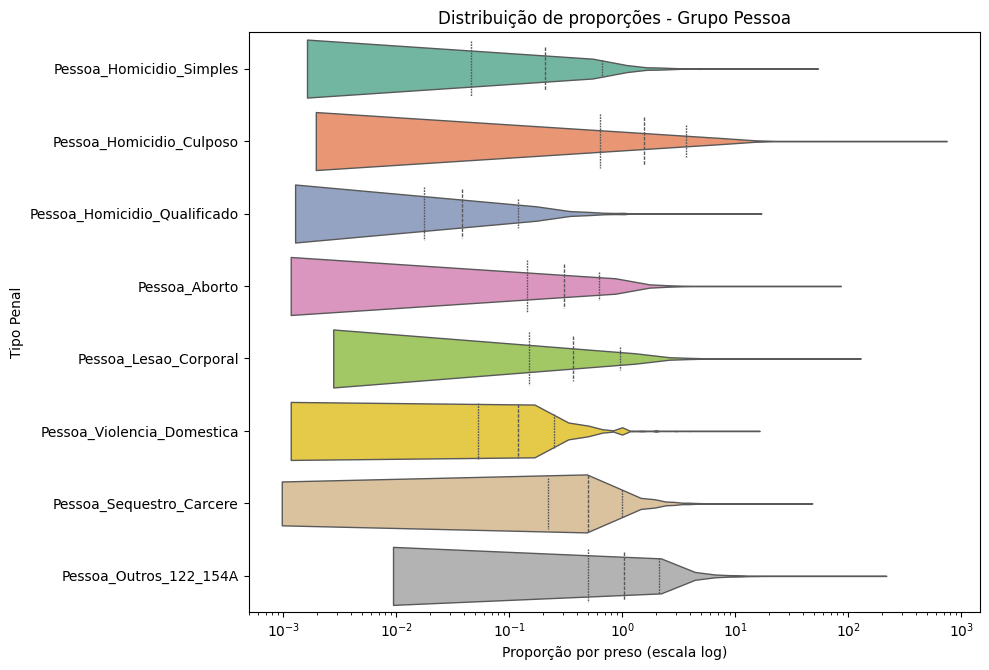

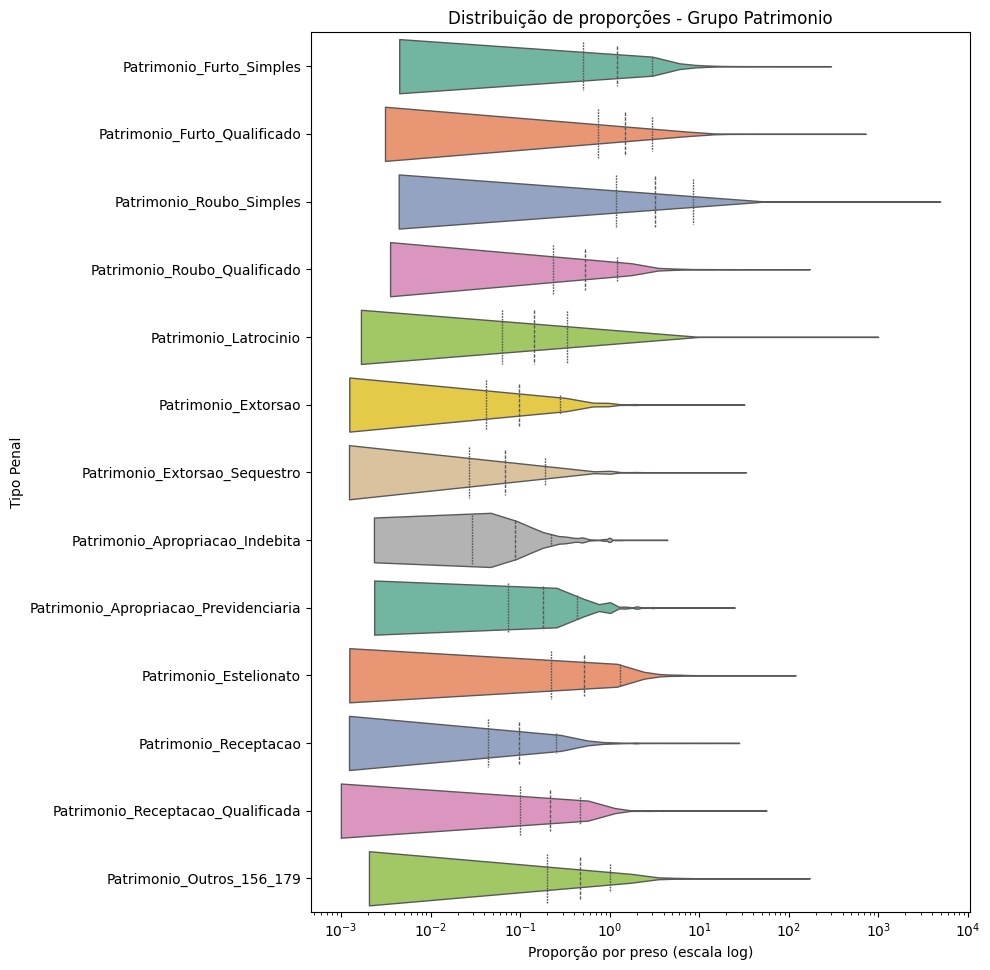

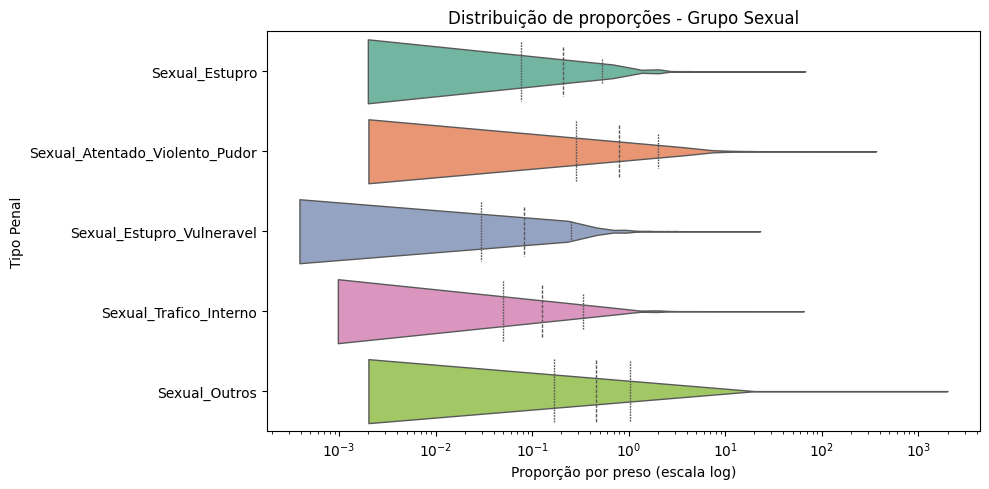

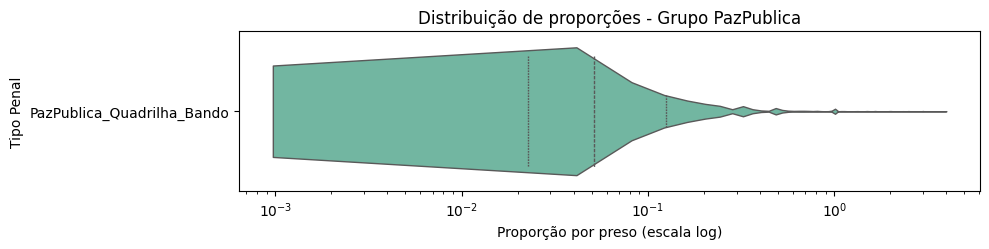

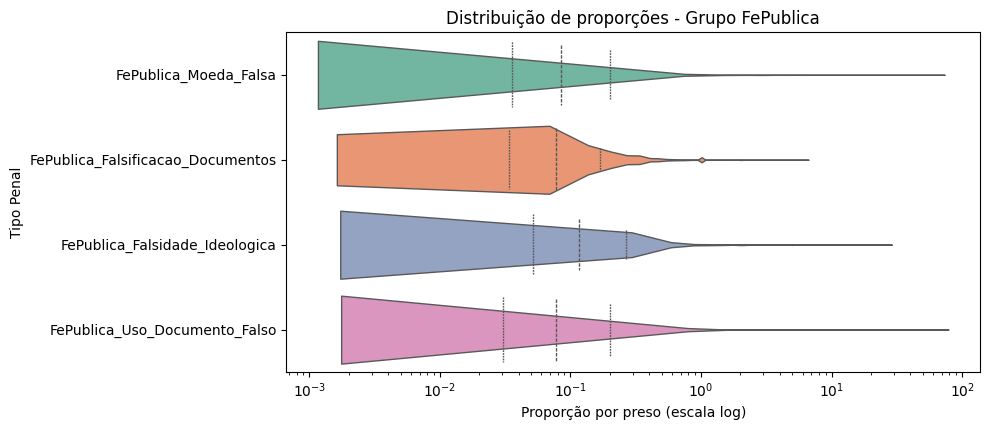

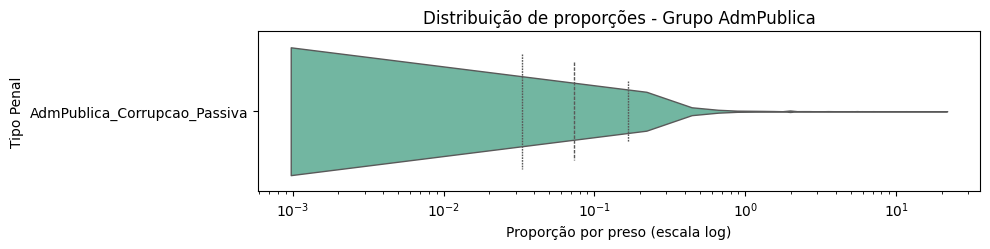

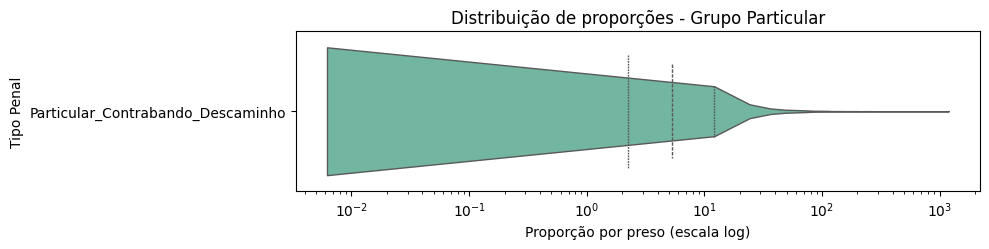

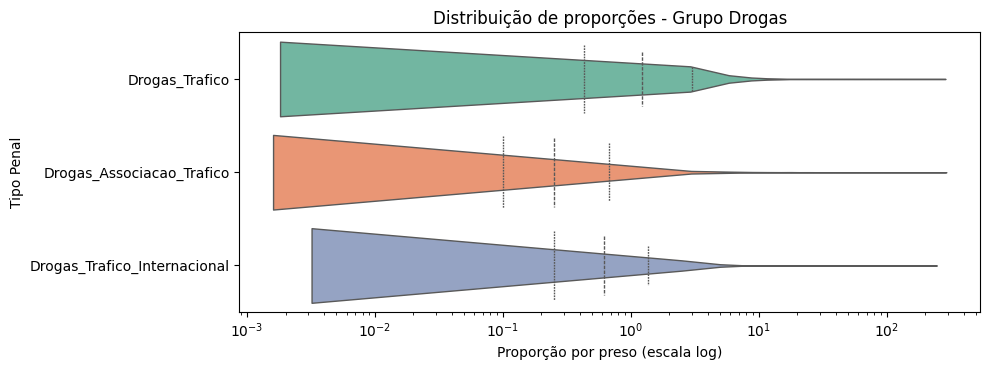

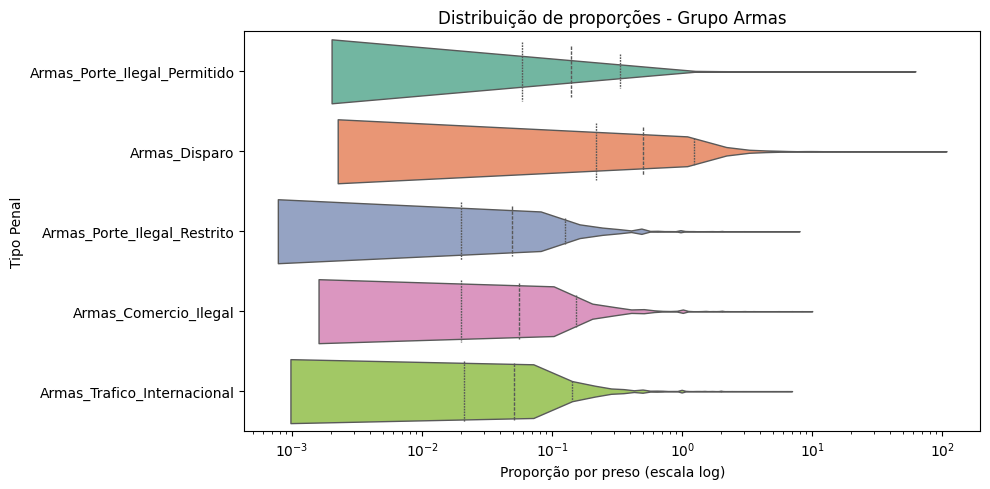

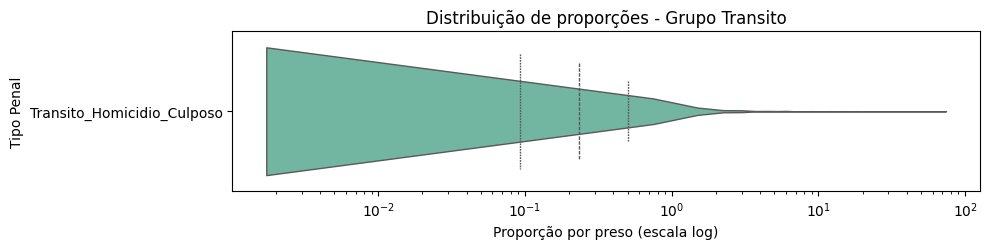

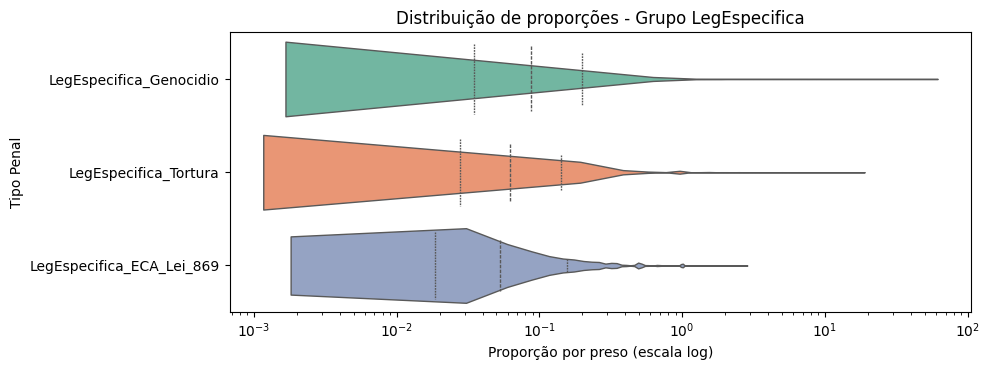

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona todas as colunas proporcionais por preso, exceto a de óbitos
# (estamos interessados em analisar apenas os tipos penais proporcionais nesse momento)
colunas_proporcionais = [
    col for col in dados_filtrados4_renomeados.columns
    if col.endswith('_por_preso') and col != 'Obitos_Criminais_Total_por_preso'
]

colunas_base_proporcionais = {
    col.replace('_por_preso', '') for col in colunas_proporcionais
}

# Separar em grupos para melhorar a visualização
grupos_crimes = {
    'Pessoa': [
        'Pessoa_Homicidio_Simples', 'Pessoa_Homicidio_Culposo', 'Pessoa_Homicidio_Qualificado',
        'Pessoa_Aborto', 'Pessoa_Lesao_Corporal', 'Pessoa_Violencia_Domestica',
        'Pessoa_Sequestro_Carcere', 'Pessoa_Outros_122_154A'
    ],
    'Patrimonio': [
        'Patrimonio_Furto_Simples', 'Patrimonio_Furto_Qualificado', 'Patrimonio_Roubo_Simples',
        'Patrimonio_Roubo_Qualificado', 'Patrimonio_Latrocinio', 'Patrimonio_Extorsao',
        'Patrimonio_Extorsao_Sequestro', 'Patrimonio_Apropriacao_Indebita',
        'Patrimonio_Apropriacao_Previdenciaria', 'Patrimonio_Estelionato',
        'Patrimonio_Receptacao', 'Patrimonio_Receptacao_Qualificada',
        'Patrimonio_Outros_156_179'
    ],
    'Sexual': [
        'Sexual_Estupro', 'Sexual_Atentado_Violento_Pudor', 'Sexual_Estupro_Vulneravel',
        'Sexual_Corrupcao_Menores', 'Sexual_Trafico_Internacional',
        'Sexual_Trafico_Interno', 'Sexual_Outros'
    ],
    'PazPublica': ['PazPublica_Quadrilha_Bando'],
    'FePublica': [
        'FePublica_Moeda_Falsa', 'FePublica_Falsificacao_Documentos',
        'FePublica_Falsidade_Ideologica', 'FePublica_Uso_Documento_Falso'
    ],
    'AdmPublica': [
        'AdmPublica_Peculato', 'AdmPublica_Concussao_Exacao', 'AdmPublica_Corrupcao_Passiva'
    ],
    'Particular': ['Particular_Corrupcao_Ativa', 'Particular_Contrabando_Descaminho'],
    'Drogas': [
        'Drogas_Trafico', 'Drogas_Associacao_Trafico', 'Drogas_Trafico_Internacional'
    ],
    'Armas': [
        'Armas_Porte_Ilegal_Permitido', 'Armas_Disparo', 'Armas_Porte_Ilegal_Restrito',
        'Armas_Comercio_Ilegal', 'Armas_Trafico_Internacional'
    ],
    'Transito': ['Transito_Homicidio_Culposo'],
    'LegEspecifica': [
        'LegEspecifica_Outros_303_312', 'LegEspecifica_ECA_Lei_8.069',
        'LegEspecifica_Genocidio', 'LegEspecifica_Tortura', 'LegEspecifica_MeioAmbiente',
        'LegEspecifica_ECA_Lei_869'
    ]
}

# Atualiza os grupos para conter apenas crimes presentes nos dados
grupos_crimes_filtrados = {
    grupo: [crime for crime in crimes if crime in colunas_base_proporcionais]
    for grupo, crimes in grupos_crimes.items()
}

# Gera plots individuais para cada grupo
for grupo, colunas_base in grupos_crimes_filtrados.items():
    dados_violin = []

    for col_base in colunas_base:
        col = col_base + '_por_preso'
        if (
            col in dados_filtrados4_renomeados.columns and
            dados_filtrados4_renomeados[col].sum() > 0
        ):
            dados = dados_filtrados4_renomeados[col]
            dados = dados[dados > 1e-5]
            for valor in dados:
                dados_violin.append({
                    'Tipo Penal': col_base,
                    'Proporcao_por_preso': valor
                })

    df_violin = pd.DataFrame(dados_violin)

    if not df_violin.empty:
        plt.figure(figsize=(10, 0.6 * len(colunas_base) + 2))
        sns.violinplot(
            data=df_violin,
            y='Tipo Penal',
            x='Proporcao_por_preso',
            hue='Tipo Penal',
            legend=False,
            density_norm='width',
            inner='quartile',
            bw_adjust=0.3,
            cut=0,
            linewidth=1,
            palette='Set2'
        )
        plt.xscale('log')
        plt.xlabel('Proporção por preso (escala log)')
        plt.ylabel('Tipo Penal')
        plt.title(f'Distribuição de proporções - Grupo {grupo}')
        plt.tight_layout()
        plt.show()

**Distribuição dos óbitos criminais proporcionais à população prisional**

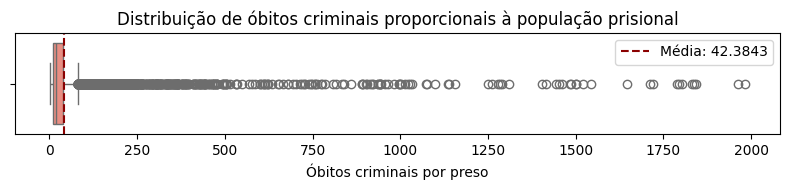

In [26]:
# Boxplot dos óbitos criminais proporcionais
plt.figure(figsize=(8, 2))
sns.boxplot(
    data=dados_filtrados4_renomeados,
    x='Obitos_Criminais_Total_por_preso',
    color='salmon'
)
media_obitos = dados_filtrados4_renomeados['Obitos_Criminais_Total_por_preso'].mean()
plt.axvline(media_obitos, color='darkred', linestyle='--', label=f'Média: {media_obitos:.4f}')
plt.title('Distribuição de óbitos criminais proporcionais à população prisional')
plt.xlabel('Óbitos criminais por preso')
plt.legend()
plt.tight_layout()
plt.show()

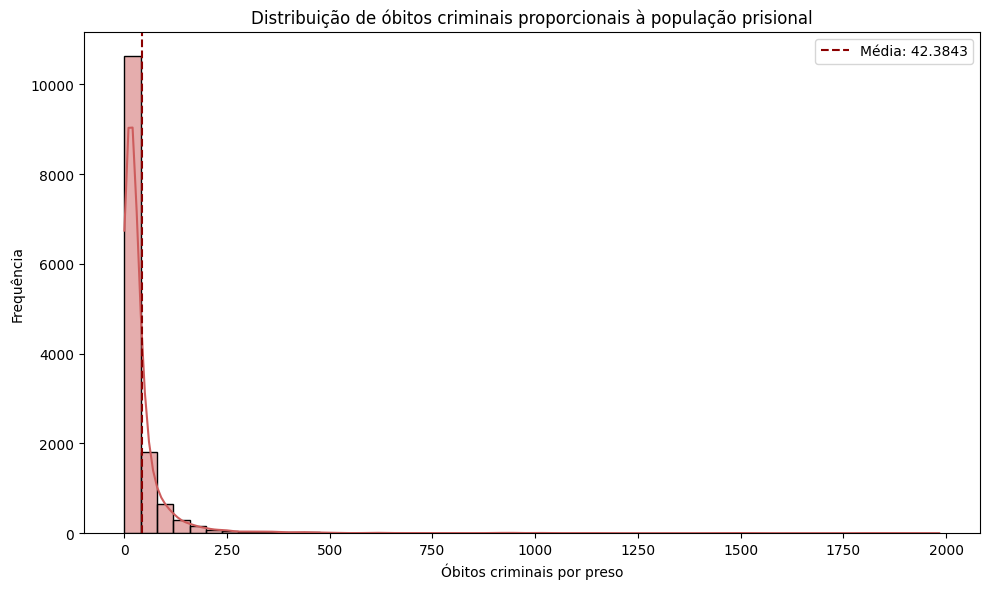

In [27]:
# Histograma com KDE para óbitos por preso
plt.figure(figsize=(10, 6))
sns.histplot(
    data=dados_filtrados4_renomeados,
    x='Obitos_Criminais_Total_por_preso',
    kde=True,
    color='indianred',
    bins=50
)
plt.axvline(media_obitos, color='darkred', linestyle='--', label=f'Média: {media_obitos:.4f}')
plt.title('Distribuição de óbitos criminais proporcionais à população prisional')
plt.xlabel('Óbitos criminais por preso')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()

- Correlações entre crimes e óbitos criminais

Dado que as variáveis em análise (proporções de presos por crime e óbitos criminais por preso) não seguem distribuição normal, optou-se por utilizar o coeficiente de Spearman.

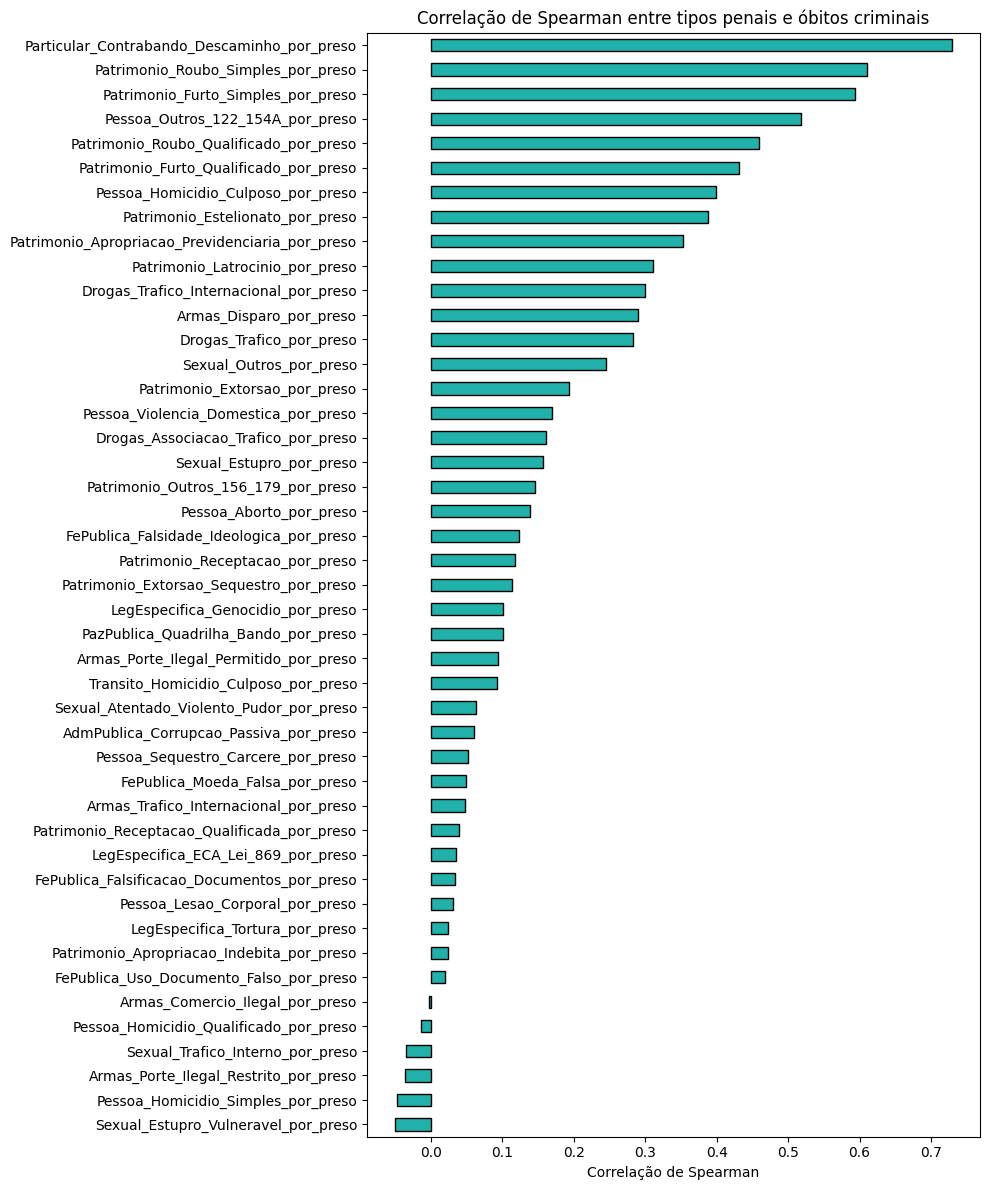

In [28]:
from scipy.stats import spearmanr

colunas_proporcionais = [col for col in colunas_proporcionais if col != 'Obitos_Criminais_Total_por_preso']

# Calcula correlações de Spearman
spearman_corr = dados_filtrados4_renomeados[colunas_proporcionais + ['Obitos_Criminais_Total_por_preso']].corr(method='spearman')

# Seleciona só a coluna de interesse
spearman_obitos = spearman_corr.loc[colunas_proporcionais, 'Obitos_Criminais_Total_por_preso'].sort_values(ascending=False)

plt.figure(figsize=(10, 12))
spearman_obitos.plot(kind='barh', color='lightseagreen', edgecolor='black')
plt.xlabel('Correlação de Spearman')
plt.title('Correlação de Spearman entre tipos penais e óbitos criminais')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

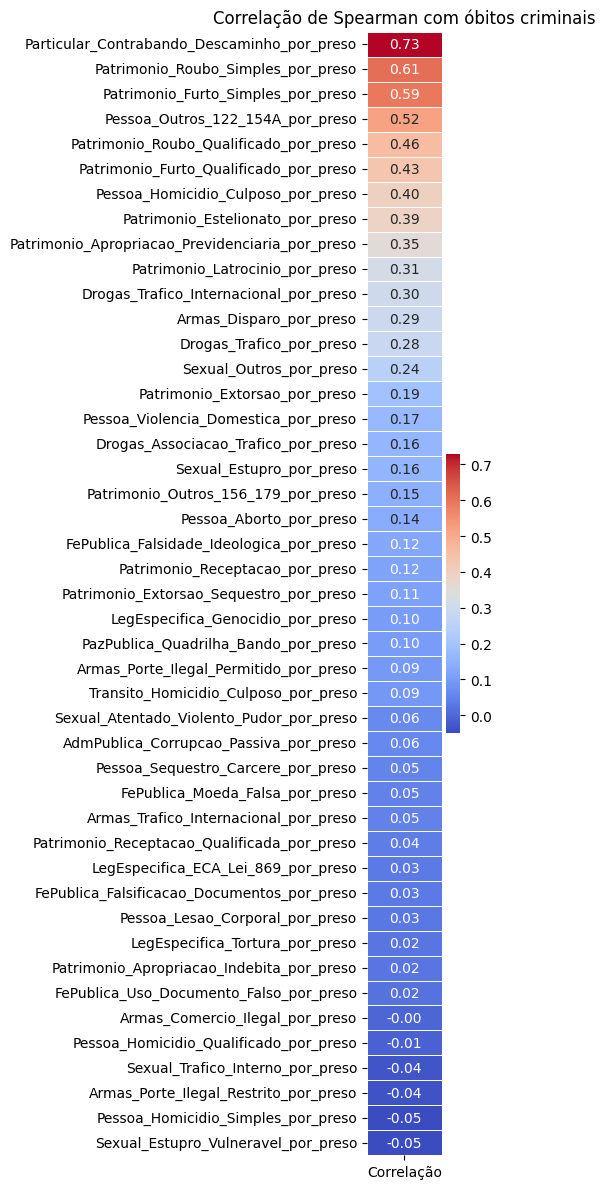

In [30]:
plt.figure(figsize=(5, 12))
sns.heatmap(spearman_obitos.to_frame(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cbar=True,
            xticklabels=['Correlação'])

plt.title('Correlação de Spearman com óbitos criminais')
plt.tight_layout()
plt.show()

## Testes de Hipótese

#### Pergunta 1: "É possível prever o número de pessoas privadas de liberdade em um estado nos próximos anos a partir do histórico da população carcerária e da disponibilidade de vagas no sistema prisional?"
Hipótese para investigar
Será que a capacidade dos presídios tem um efeito estatisticamente significativo na quantidade de presos ao longo do tempo?

Hipótese Nula
H0: Não há correlação significativa entre a capacidade disponível e o número de presos.

H1: Há correlação significativa entre a capacidade disponível e o número de presos.

#### Pergunta 2: "A adoção das audiências de custódia, implementadas a partir de 2015, teve impacto significativo na redução da proporção de presos no Brasil?"

#### Pergunta 3: "Existe uma correlação entre a falta de estrutura prisional (como superlotação e falta de recursos*) e a frequência de motins, rebeliões e outras formas de distúrbios internos?"

#### Pergunta 4: "Existe uma correlação entre o tipo de crime pelo qual os detentos foram condenados e a incidência de óbitos prisionais de natureza criminal?"  
Hipóteses:
Para cada tipo de crime C, testamos a seguinte hipótese:
- Hipótese nula (H0): Não existe correlação entre a proporção de presos por crime C e a proporção de óbitos criminais. H0: p = 0
- Hipótese alternativa (H1): Existe correlação entre a proporção de presos por crime C e a proporção de óbitos criminais. H1: p != 0

Teste estatístico
- Correlação de Spearman com cálculo de p-valor associado
- Nível de significância: α = 0.05

## Resultados e Discussões